In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

plt.rcParams['figure.facecolor'] = 'black'
plt.rcParams['axes.facecolor'] = 'black'
plt.rcParams['axes.edgecolor'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['text.color'] = 'white'
plt.rcParams['grid.color'] = 'white'

pathfile=r'/media/nicolascatz/4d767acb-7d35-42a5-b630-86a61f8774d0/nicolascatz/DATA/Projets/CRPN_DTI_AGING_DPAKNC/'

pathdata=pathfile+'data/'
pathdata_tractography=pathfile+'data/Corrected_Tractometry2025'
pathcsv=pathfile+'CSV/'
os.chdir(pathfile)

addtotitle='_112025_42s' # to specify the version of the data

Aging_INDICES = pd.read_csv('Subject_preproc' + addtotitle + '.csv')

CCx_list = ['CC_1','CC_2','CC_3','CC_4','CC_5','CC_6','CC_7']

DTI=np.zeros((42, 98, 7))  # 10 DTI metrics
for i, CC in enumerate(CCx_list):
    file_path = os.path.join(pathcsv, f'{CC}_FA{addtotitle}.csv')
    dfCCx = pd.read_csv(file_path, sep=",")
    DTI[:,:,i]=dfCCx.values  ## une variable DTI of shape subjects x nodes x n CC



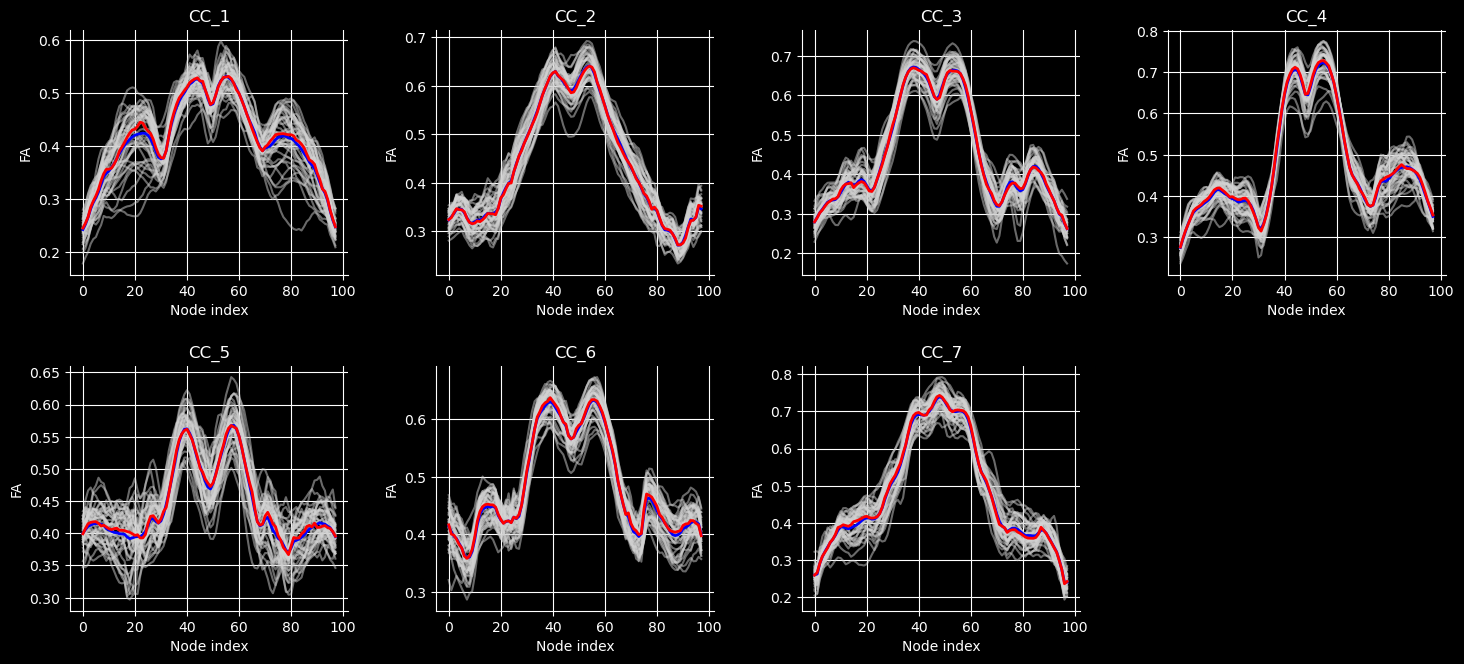

In [13]:
CCx_list = ['CC_1','CC_2','CC_3','CC_4','CC_5','CC_6','CC_7']
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(15, 7))
axs = axs.flatten()

for i, CCx in enumerate(CCx_list[0:7]):
    file_path = os.path.join(pathcsv, f'{CCx}_FA{addtotitle}.csv')

    axs[i].plot(DTI[:,:,i].T, color='lightgray', alpha=0.5)
    axs[i].plot(DTI[:,:,i].mean(axis=0), color='blue', linewidth=2)
    axs[i].plot(np.median(DTI[:,:,i], axis=0), color='red', linewidth=2)
    axs[i].set_xlabel('Node index')
    axs[i].set_ylabel('FA')
    axs[i].grid(True)
    axs[i].spines['top'].set_visible(False)
    axs[i].spines['right'].set_visible(False)
    axs[i].set_title(CCx)
    
fig.delaxes(axs[7])
plt.tight_layout(pad=2.0)



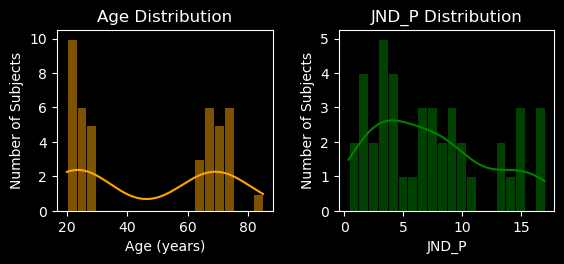

In [14]:
 # target var

import seaborn as sns

age = Aging_INDICES['age'].values
jnd = Aging_INDICES['JND_P'].values

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))
axs = axs.flatten()

sns.histplot(age, bins=20, ax=axs[0],color='orange',kde=True)
axs[0].set_title('Age Distribution')
axs[0].set_xlabel('Age (years)')
axs[0].set_ylabel('Number of Subjects')
sns.histplot(jnd, bins=20, ax=axs[1],color='green',kde=True)
axs[1].set_title('JND_P Distribution')
axs[1].set_xlabel('JND_P')
axs[1].set_ylabel('Number of Subjects')
plt.tight_layout(pad=2.0)
plt.show()


test of Regression models with DTI data on CC6

In [175]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.exceptions import ConvergenceWarning
import warnings

warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold, GridSearchCV, learning_curve
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_regression, SelectFromModel
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import Lasso, Ridge, LassoCV, RidgeCV
from sklearn.pipeline import Pipeline

labels = [0,1]
Aging_INDICES['JND_group'] = pd.qcut(Aging_INDICES['JND_P'], q=2, labels=labels)

age = Aging_INDICES['age'].values
jnd = Aging_INDICES['JND_P'].values
age_grouped = Aging_INDICES['group_O']
jnd_grouped = Aging_INDICES['JND_group']

Aging_INDICES



,sub,age,group,JND_P,group_O,group_Y,JND_group
0,sub-01,25,Y,9.5600,0.0,1.0,1
1,sub-02,27,Y,6.6900,0.0,1.0,0
2,sub-03,28,Y,12.9200,0.0,1.0,1
3,sub-05,21,Y,1.9500,0.0,1.0,0
4,sub-06,25,Y,2.5400,0.0,1.0,0
5,sub-08,67,O,4.4800,1.0,0.0,0
6,sub-09,73,O,9.6300,1.0,0.0,1
7,sub-10,64,O,7.2700,1.0,0.0,1
8,sub-11,21,Y,1.6200,0.0,1.0,0
9,sub-12,21,Y,3.6800,0.0,1.0,0


Meilleur C (inverse de alpha): 0.19179102616724888
Précision sur le test: 0.5555555555555556

Rapport de classification:
               precision    recall  f1-score   support

           0       0.60      0.60      0.60         5
           1       0.50      0.50      0.50         4

    accuracy                           0.56         9
   macro avg       0.55      0.55      0.55         9
weighted avg       0.56      0.56      0.56         9


Matrice de confusion:
 [[3 2]
 [2 2]]
Nombre de variables sélectionnées: 3
Variables sélectionnées :
33: -0.2454
51: -0.2954
82: -0.2068


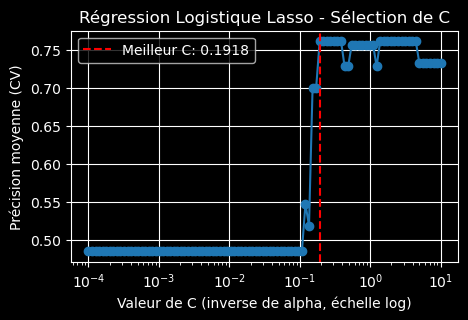

In [176]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Exemple de données (remplacez par les vôtres)
#X = np.random.randn(42, 98)  # 42 sujets, 98 variables
# y = np.random.randint(0, 2, 42)  # Variable cible binaire (0 ou 1)


X_df = pd.DataFrame(DTI[:,:,5])


X=X_df
y=jnd_grouped # jnd_grouped or age_grouped or age or JND_P



# Séparation des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

# Pipeline avec RobustScaler et LogisticRegression (Lasso)
pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('logistic', LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000))
])

# Grille de paramètres pour C (inverse de alpha)
param_grid = {'logistic__C': np.logspace(-4, 1, 100)}

# GridSearchCV
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

# Meilleur modèle et prédictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Métriques
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
num_non_zero = np.sum(best_model.named_steps['logistic'].coef_[0] != 0)

# Affichage des résultats
print("Meilleur C (inverse de alpha):", grid_search.best_params_['logistic__C'])
print("Précision sur le test:", accuracy)
print("\nRapport de classification:\n", report)
print("\nMatrice de confusion:\n", conf_matrix)
print("Nombre de variables sélectionnées:", num_non_zero)

# Visualisation des scores de validation croisée
results = grid_search.cv_results_
Cs = param_grid['logistic__C']
mean_scores = results['mean_test_score']



# Coefficients du modèle
coef = best_model.named_steps['logistic'].coef_[0]

# Variables sélectionnées (coefficients non nuls)
selected_features = X.columns[coef != 0]
selected_coefficients = coef[coef != 0]

# Affichage
print("Variables sélectionnées :")
for feature, coef in zip(selected_features, selected_coefficients):
    print(f"{feature}: {coef:.4f}")

plt.figure(figsize=(5, 3))
plt.semilogx(Cs, mean_scores, marker='o')
plt.axvline(grid_search.best_params_['logistic__C'], color='r', linestyle='--',
            label=f'Meilleur C: {grid_search.best_params_["logistic__C"]:.4f}')
plt.xlabel('Valeur de C (inverse de alpha, échelle log)')
plt.ylabel('Précision moyenne (CV)')
plt.title('Régression Logistique Lasso - Sélection de C')
plt.legend()
plt.grid(True)
plt.show()


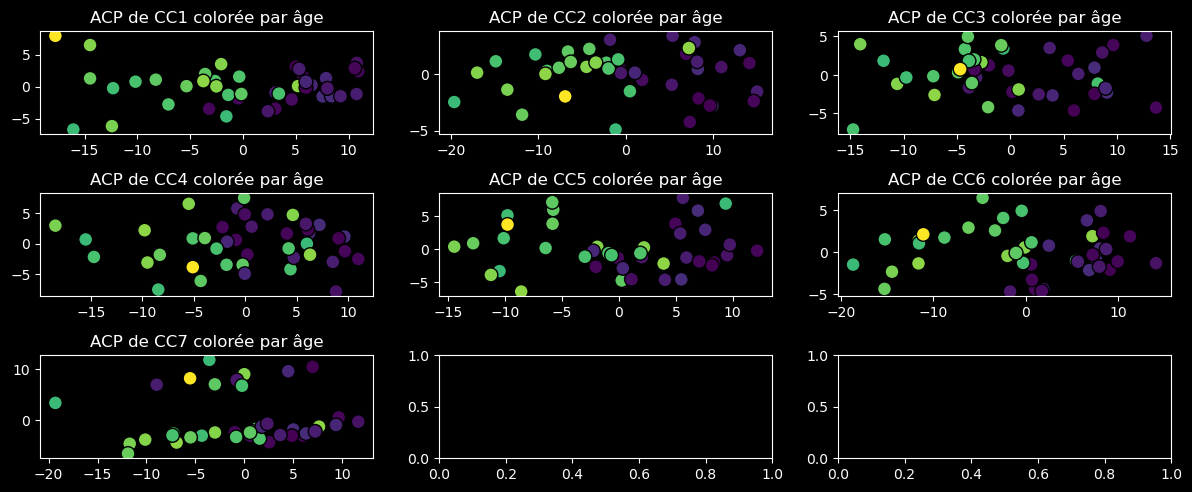

In [193]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



fig, ax = plt.subplots(3, 3, figsize=(12, 5))
ax = ax.flatten()

for cc in range(7):
     X = pd.DataFrame(DTI[:,:,cc])
     y = age # jnd_grouped or age_grouped or age or JND_P

     scaler = StandardScaler()
     X_scaled = scaler.fit_transform(X)

     pca = PCA(n_components=2)  # On garde 2 composantes pour la visualisation
     X_pca = pca.fit_transform(X_scaled)

     scatter = ax[cc].scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolor='k', s=100)
     ax[cc].set_xlabel('')
     ax[cc].set_ylabel('')
     ax[cc].set_title(f'ACP de CC{cc+1} colorée par âge')

plt.tight_layout(pad=1.0  )





